In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy
%matplotlib inline

**11. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.(a) Create a binary variable, mpg01 , that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.**

In [2]:
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
Auto['mpg'].median()

22.75

In [4]:
Auto['mpg01'] = (Auto['mpg'] >= Auto['mpg'].median()) * 1

In [5]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0


In [6]:
Auto.sort_values('mpg',ascending=False).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc,1
329,44.6,4,91.0,67.0,1850,13.8,80,3,honda civic 1500 gl,1
325,44.3,4,90.0,48.0,2085,21.7,80,2,vw rabbit c (diesel),1
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1
326,43.4,4,90.0,48.0,2335,23.7,80,2,vw dasher (diesel),1


**(b) Explore the data graphically in order to investigate the associ-
ation between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01 ? Scat-
terplots and boxplots may be useful tools to answer this ques-
tion. Describe your findings.**

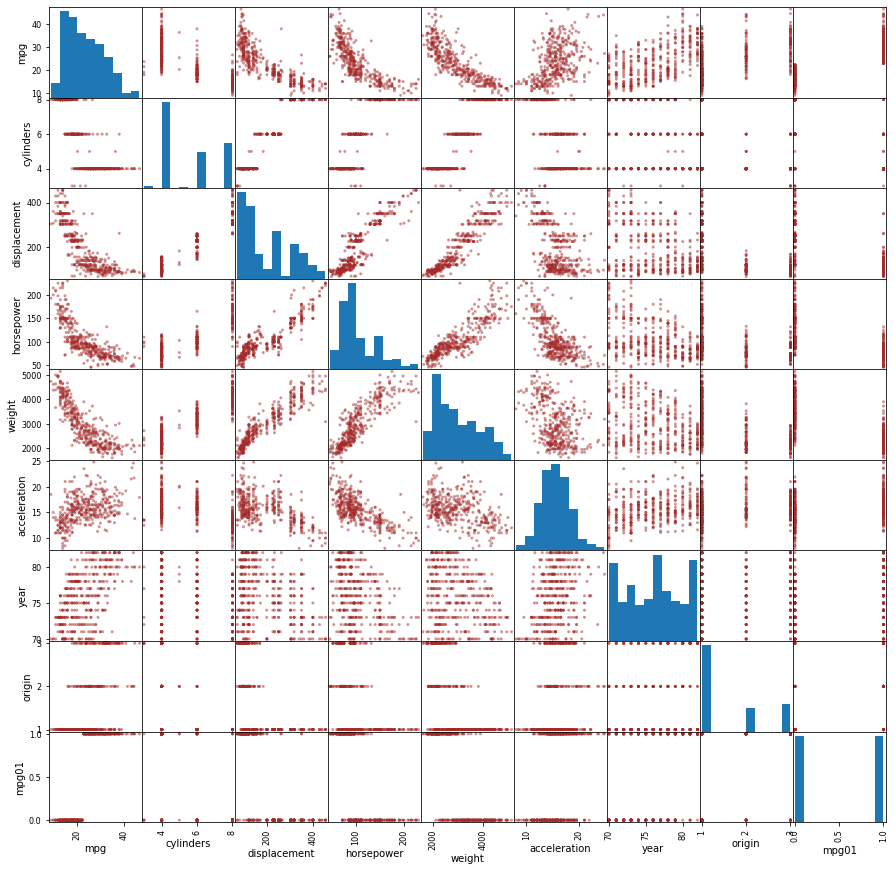

In [7]:
#散点图关系
from pandas.plotting import scatter_matrix
scatter_matrix(Auto, color="brown",figsize = (15,15))
plt.grid(linestyle='')

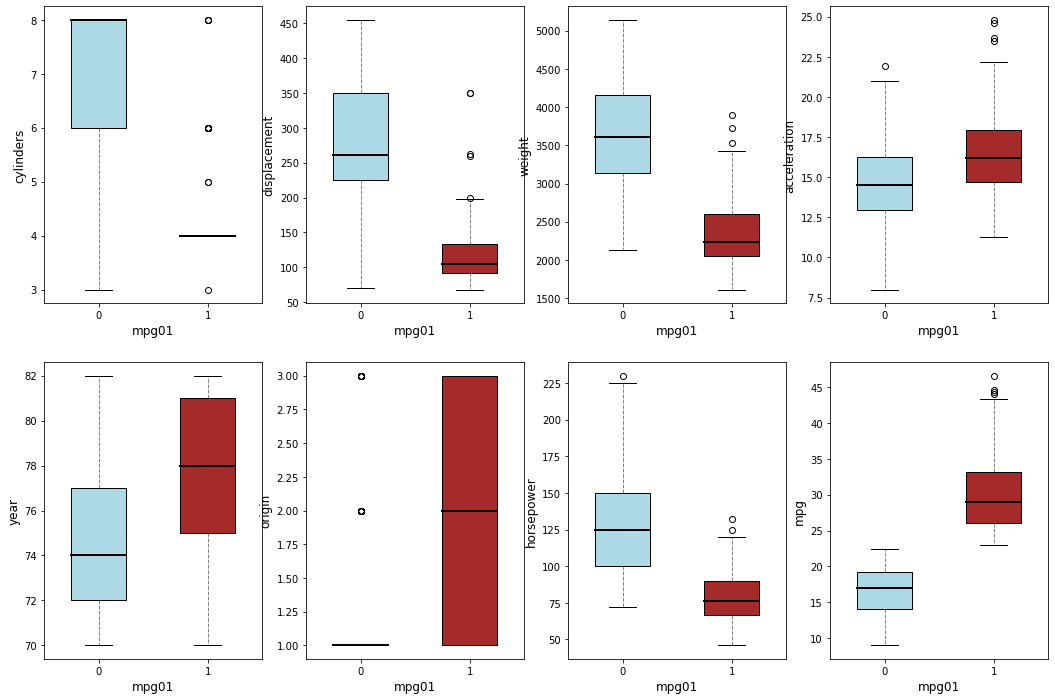

In [8]:
#箱线图关系
def boxplot_out(data,column,by,values):
    data_balance = []
    v_len = len(values)
    for value in values:
        data_balance.append(data[data[by] == value][column])
    bp = plt.boxplot(data_balance,sym = 'o', patch_artist = True ,widths=0.5)
    for box in bp['boxes']:
        box.set( color='Black', linewidth=1)        # 箱体边框颜色
    for whisker in bp['whiskers']:
        whisker.set(color='k', linewidth=0.5,linestyle='-.')
    for cap in bp['caps']:
        cap.set(color='Black', linewidth=1)
    for median in bp['medians']:
        median.set(color='Black', linewidth=2)
    for flier in bp['fliers']:
        flier.set(marker='o',color='Black',linewidth=0.5,alpha = 1)
    bp['boxes'][0].set(facecolor = 'lightblue' )
    bp['boxes'][1].set(facecolor = 'brown' )
    plt.xlabel(by, fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(range(1,v_len + 1),values)
    
columns = ['cylinders','displacement','weight','acceleration','year','origin','horsepower','mpg']
by = 'mpg01'
values = [0,1]

plt.figure(figsize=(18,12))
#左图绘制
for i in range(8):
    pic_num = '24' + str(i + 1)
    plt.subplot(pic_num)
    boxplot_out(Auto,columns[i],by,values)
plt.show()

In [9]:
Auto.corr().sort_values('mpg01',ascending=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194


**与mpg/origin/year/acceleration正相关，与horsepower/displacement/weight/cylinders负相关**

**(c) Split the data into a training set and a test set**

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Auto, test_size=0.2, random_state=427)

**(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?**

In [11]:
y_train,X_train = patsy.dmatrices('mpg01 ~ 0 + origin + year + acceleration+ horsepower + displacement + weight + cylinders',
                                  data = train_set,return_type="dataframe")
y_test,X_test = patsy.dmatrices('mpg01 ~ 0 + origin + year + acceleration+ horsepower + displacement + weight + cylinders',
                                data = test_set,return_type="dataframe")

In [12]:
#由于statsmodels没有搜索到LDA/LQA的相关模块，直接使用sklearn实现
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, np.c_[y_train].ravel())

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [13]:
1 - lda.score(X_test,np.c_[y_test].ravel())

0.11392405063291144

**(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?**

In [14]:
#由于statsmodels没有搜索到LDA/LQA的相关模块，直接使用sklearn实现
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, np.c_[y_train].ravel())
1 - qda.score(X_test,np.c_[y_test].ravel())

0.11392405063291144

**(f) Perform logistic regression on the training data in order to pre-
dict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?**

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty = 'none')
log_reg.fit(X_train, np.c_[y_train].ravel())
1 - log_reg.score(X_test,np.c_[y_test].ravel())

0.10126582278481011

**(g) Perform KNN on the training data, with several values of K, in
order to predict mpg01 . Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?**

In [16]:
#方法1，使用k=1,10,100比较
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(427)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, np.c_[y_train].ravel())
print('k=1',1 - knn.score(X_test,np.c_[y_test].ravel()))
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, np.c_[y_train].ravel())
print('k=10',1 - knn.score(X_test,np.c_[y_test].ravel()))
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, np.c_[y_train].ravel())
print('k=100',1 - knn.score(X_test,np.c_[y_test].ravel()))

k=1 0.12658227848101267
k=10 0.15189873417721522
k=100 0.12658227848101267


In [17]:
#方法2，使用用GridSearchCV搜寻最好的k参数
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_neighbors': list(range(1,200))},
]
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, np.c_[y_train].ravel())
grid_search.best_params_

{'n_neighbors': 7}

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, np.c_[y_train].ravel())
print('k = 7',1 - knn.score(X_test,np.c_[y_test].ravel()))

k = 7 0.16455696202531644


**评估结果通常要比交叉验证的效果差一点，如果你之前做过很多超参数微调（因为你的系统
在验证集上微调，得到了不错的性能，通常不会在未知的数据集上有同样好的效果）。这个
例子不属于这种情况，但是当发生这种情况时，你一定要忍住不要调节超参数，使测试集的
效果变好；这样的提升不能推广到新数据上。**